In [12]:
import json
import pandas as pd

In [13]:
path="/content/user-wallet-transactions.json"

In [14]:
data=pd.read_json(file_path)

In [15]:
data.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


In [16]:
data.columns

Index(['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId',
       'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt',
       'updatedAt'],
      dtype='object')

In [17]:
print(data.iloc[0])

_id                         {'$oid': '681d38fed63812d4655f571a'}
userWallet            0x00000000001accfa9cef68cf5371a23025b6d4b6
network                                                  polygon
protocol                                                 aave_v2
txHash         0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...
logId          0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...
timestamp                                    2021-08-17 05:29:26
blockNumber                                           1629178166
action                                                   deposit
actionData     {'type': 'Deposit', 'amount': '2000000000', 'a...
__v                                                            0
createdAt                  {'$date': '2025-05-08T23:06:39.465Z'}
updatedAt                  {'$date': '2025-05-08T23:06:39.465Z'}
Name: 0, dtype: object


In [18]:
data.shape

(100000, 13)

In [19]:
data['action'].value_counts()

,count
action,
deposit,37808
redeemunderlying,32305
borrow,17086
repay,12553
liquidationcall,248


In [20]:
data.isnull().sum()

,0
_id,0
userWallet,0
network,0
protocol,0
txHash,0
logId,0
timestamp,0
blockNumber,0
action,0
actionData,0


In [30]:
data['amount'] = data['actionData'].apply(lambda x: x.get('amount'))
# Convert the 'amount' column to numeric, coercing errors
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

In [32]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date'] = data['timestamp'].dt.date

In [33]:
data.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt,amount,date
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'},2.000000e+09,2021-08-17
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'},1.450000e+20,2021-05-20
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'},1.000000e+15,2021-07-24
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'},4.000000e+15,2021-07-31
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'},5.015480e+05,2021-04-19


In [34]:
# Transaction frequency features
wallet_agg = data.groupby('userWallet').agg(
    total_transactions=('action', 'count'),
    unique_days=('date', 'nunique'),
    first_txn=('timestamp', 'min'),
    last_txn=('timestamp', 'max')
)

wallet_agg['active_days'] = (wallet_agg['last_txn'] - wallet_agg['first_txn']).dt.days + 1
wallet_agg['txn_per_day'] = wallet_agg['total_transactions'] / wallet_agg['active_days']

In [35]:
wallet_agg

,total_transactions,unique_days,first_txn,last_txn,active_days,txn_per_day
userWallet,,,,,,
0x00000000001accfa9cef68cf5371a23025b6d4b6,1,1,2021-08-17 05:29:26,2021-08-17 05:29:26,1,1.000000
0x000000000051d07a4fb3bd10121a343d85818da6,1,1,2021-05-20 15:36:53,2021-05-20 15:36:53,1,1.000000
0x000000000096026fb41fc39f9875d164bd82e2dc,2,2,2021-07-24 09:28:33,2021-07-31 23:15:18,8,0.250000
0x0000000000e189dd664b9ab08a33c4839953852c,17,8,2021-04-19 15:23:17,2021-08-26 23:15:16,130,0.130769
0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,104,2021-04-21 21:28:30,2021-09-01 18:15:24,133,3.000000
...,...,...,...,...,...,...
0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,1,1,2021-07-12 22:31:43,2021-07-12 22:31:43,1,1.000000
0x06189341e523a52ae10c4bd4a7774371fac1b249,7,1,2021-05-30 07:22:19,2021-05-30 14:02:49,1,7.000000
0x0618c450370822c5cb25ec143a3008230d8e2c12,5,1,2021-05-20 03:52:58,2021-05-20 04:08:15,1,5.000000


In [36]:
action_counts = data.pivot_table(index='userWallet', columns='action', aggfunc='size', fill_value=0)

In [37]:
action_counts

action,borrow,deposit,liquidationcall,redeemunderlying,repay
userWallet,,,,,
0x00000000001accfa9cef68cf5371a23025b6d4b6,0,1,0,0,0
0x000000000051d07a4fb3bd10121a343d85818da6,0,1,0,0,0
0x000000000096026fb41fc39f9875d164bd82e2dc,0,2,0,0,0
0x0000000000e189dd664b9ab08a33c4839953852c,0,0,0,17,0
0x0000000002032370b971dabd36d72f3e5a7bf1ee,15,250,0,130,4
...,...,...,...,...,...
0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,0,1,0,0,0
0x06189341e523a52ae10c4bd4a7774371fac1b249,1,4,0,2,0
0x0618c450370822c5cb25ec143a3008230d8e2c12,0,1,0,4,0


In [38]:
amount_sums = data.groupby(['userWallet', 'action'])['amount'].sum().unstack(fill_value=0)
# Add behavioral ratios
amount_sums['net_balance'] = amount_sums.get('deposit', 0) - amount_sums.get('borrow', 0) - amount_sums.get('liquidationcall', 0)
amount_sums['repay_to_borrow'] = amount_sums.get('repay', 0) / (amount_sums.get('borrow', 1))
amount_sums['redeem_to_deposit'] = amount_sums.get('redeemunderlying', 0) / (amount_sums.get('deposit', 1))

In [39]:
amount_sums

action,borrow,deposit,liquidationcall,redeemunderlying,repay,net_balance,repay_to_borrow,redeem_to_deposit
userWallet,,,,,,,,
0x00000000001accfa9cef68cf5371a23025b6d4b6,0.000000e+00,2.000000e+09,0.0,0.000000e+00,0.000000e+00,2.000000e+09,NaN,0.000000
0x000000000051d07a4fb3bd10121a343d85818da6,0.000000e+00,1.450000e+20,0.0,0.000000e+00,0.000000e+00,1.450000e+20,NaN,0.000000
0x000000000096026fb41fc39f9875d164bd82e2dc,0.000000e+00,5.000000e+15,0.0,0.000000e+00,0.000000e+00,5.000000e+15,NaN,0.000000
0x0000000000e189dd664b9ab08a33c4839953852c,0.000000e+00,0.000000e+00,0.0,4.835297e+18,0.000000e+00,0.000000e+00,NaN,inf
0x0000000002032370b971dabd36d72f3e5a7bf1ee,3.946000e+22,9.459366e+22,0.0,3.946556e+22,7.002457e+10,5.513366e+22,1.774571e-12,0.417211
...,...,...,...,...,...,...,...,...
0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,0.000000e+00,9.800000e+01,0.0,0.000000e+00,0.000000e+00,9.800000e+01,NaN,0.000000
0x06189341e523a52ae10c4bd4a7774371fac1b249,1.250000e+18,9.664408e+18,0.0,6.064412e+18,0.000000e+00,8.414408e+18,0.000000e+00,0.627500
0x0618c450370822c5cb25ec143a3008230d8e2c12,0.000000e+00,1.410546e+19,0.0,7.087429e+21,0.000000e+00,1.410546e+19,NaN,502.459830


In [43]:
wallet_features = wallet_agg.join(action_counts, how='outer', lsuffix='_agg', rsuffix='_count').join(amount_sums, how='outer', rsuffix='_amount')
wallet_features = wallet_features.fillna(0).reset_index()

In [44]:
wallet_features

,userWallet,total_transactions,unique_days,first_txn,last_txn,active_days,txn_per_day,borrow,deposit,liquidationcall,redeemunderlying,repay,borrow_amount,deposit_amount,liquidationcall_amount,redeemunderlying_amount,repay_amount,net_balance,repay_to_borrow,redeem_to_deposit
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,1,2021-08-17 05:29:26,2021-08-17 05:29:26,1,1.000000,0,1,0,0,0,0.000000e+00,2.000000e+09,0.0,0.000000e+00,0.000000e+00,2.000000e+09,0.000000e+00,0.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,1,2021-05-20 15:36:53,2021-05-20 15:36:53,1,1.000000,0,1,0,0,0,0.000000e+00,1.450000e+20,0.0,0.000000e+00,0.000000e+00,1.450000e+20,0.000000e+00,0.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,2,2021-07-24 09:28:33,2021-07-31 23:15:18,8,0.250000,0,2,0,0,0,0.000000e+00,5.000000e+15,0.0,0.000000e+00,0.000000e+00,5.000000e+15,0.000000e+00,0.000000
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,8,2021-04-19 15:23:17,2021-08-26 23:15:16,130,0.130769,0,0,0,17,0,0.000000e+00,0.000000e+00,0.0,4.835297e+18,0.000000e+00,0.000000e+00,0.000000e+00,inf
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,104,2021-04-21 21:28:30,2021-09-01 18:15:24,133,3.000000,15,250,0,130,4,3.946000e+22,9.459366e+22,0.0,3.946556e+22,7.002457e+10,5.513366e+22,1.774571e-12,0.417211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,1,1,2021-07-12 22:31:43,2021-07-12 22:31:43,1,1.000000,0,1,0,0,0,0.000000e+00,9.800000e+01,0.0,0.000000e+00,0.000000e+00,9.800000e+01,0.000000e+00,0.000000
3493,0x06189341e523a52ae10c4bd4a7774371fac1b249,7,1,2021-05-30 07:22:19,2021-05-30 14:02:49,1,7.000000,1,4,0,2,0,1.250000e+18,9.664408e+18,0.0,6.064412e+18,0.000000e+00,8.414408e+18,0.000000e+00,0.627500
3494,0x0618c450370822c5cb25ec143a3008230d8e2c12,5,1,2021-05-20 03:52:58,2021-05-20 04:08:15,1,5.000000,0,1,0,4,0,0.000000e+00,1.410546e+19,0.0,7.087429e+21,0.000000e+00,1.410546e+19,0.000000e+00,502.459830
3495,0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2,22,11,2021-06-10 22:09:52,2021-07-11 23:44:47,32,0.687500,2,13,0,5,2,1.200000e+09,1.725242e+21,0.0,7.910896e+20,2.001084e+08,1.725242e+21,1.667570e-01,0.458538


In [45]:
import numpy as np

def score_wallet(row):
    score = 500  # start from base score

    # Frequency-based score
    if row['txn_per_day'] > 1:
        score += 100
    elif row['txn_per_day'] > 0.5:
        score += 50

    # Volume-based score
    score += min(row.get('deposit', 0) / 1000, 100)
    score += min(row.get('repay_to_borrow', 0) * 100, 100)

    # Penalty for liquidation
    score -= min(row.get('liquidationcall', 0) * 50, 200)

    # Cap score between 0 and 1000
    return np.clip(score, 0, 1000)

wallet_features['score'] = wallet_features.apply(score_wallet, axis=1)


In [46]:
# Top 10 highest scoring wallets
print(wallet_features[['userWallet', 'score']].sort_values(by='score', ascending=False).head(10))

                                      userWallet    score
2648  0x049940feda4277b7f01ef10fca0b975c541d8fca  700.196
2579  0x047a96ef72d7ee6a3f193bdb92e998fb300265df  700.179
430   0x009ff94a057c75f661e3e28f89b9b9d84e57fc67  700.165
2503  0x045751c6c2dc89cb7d5976649eb63de2b2d77f5b  700.155
705   0x0122a648094d10ea18ae72673aea0334fae4d3a5  700.145
2185  0x03b16ab6e23bdbeeab719d8e4c49d63674876253  700.143
2585  0x047ea31614fc085ce7b80412fbab65fd51a8bb7a  700.141
1818  0x0314d69c14328bed45a45f96a75400f733164e13  700.134
154   0x003a85c562730b196f7cba202a2515f2ff855736  700.131
2660  0x049eebc628e60f804daae62df6c3715b9273b2c2  700.127


In [47]:
wallet_features[['userWallet', 'score']].to_csv("wallet_scores.csv", index=False)

In [48]:
wallet_features

,userWallet,total_transactions,unique_days,first_txn,last_txn,active_days,txn_per_day,borrow,deposit,liquidationcall,...,repay,borrow_amount,deposit_amount,liquidationcall_amount,redeemunderlying_amount,repay_amount,net_balance,repay_to_borrow,redeem_to_deposit,score
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,1,2021-08-17 05:29:26,2021-08-17 05:29:26,1,1.000000,0,1,0,...,0,0.000000e+00,2.000000e+09,0.0,0.000000e+00,0.000000e+00,2.000000e+09,0.000000e+00,0.000000,550.001000
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,1,2021-05-20 15:36:53,2021-05-20 15:36:53,1,1.000000,0,1,0,...,0,0.000000e+00,1.450000e+20,0.0,0.000000e+00,0.000000e+00,1.450000e+20,0.000000e+00,0.000000,550.001000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,2,2021-07-24 09:28:33,2021-07-31 23:15:18,8,0.250000,0,2,0,...,0,0.000000e+00,5.000000e+15,0.0,0.000000e+00,0.000000e+00,5.000000e+15,0.000000e+00,0.000000,500.002000
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,8,2021-04-19 15:23:17,2021-08-26 23:15:16,130,0.130769,0,0,0,...,0,0.000000e+00,0.000000e+00,0.0,4.835297e+18,0.000000e+00,0.000000e+00,0.000000e+00,inf,500.000000
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,104,2021-04-21 21:28:30,2021-09-01 18:15:24,133,3.000000,15,250,0,...,4,3.946000e+22,9.459366e+22,0.0,3.946556e+22,7.002457e+10,5.513366e+22,1.774571e-12,0.417211,600.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,1,1,2021-07-12 22:31:43,2021-07-12 22:31:43,1,1.000000,0,1,0,...,0,0.000000e+00,9.800000e+01,0.0,0.000000e+00,0.000000e+00,9.800000e+01,0.000000e+00,0.000000,550.001000
3493,0x06189341e523a52ae10c4bd4a7774371fac1b249,7,1,2021-05-30 07:22:19,2021-05-30 14:02:49,1,7.000000,1,4,0,...,0,1.250000e+18,9.664408e+18,0.0,6.064412e+18,0.000000e+00,8.414408e+18,0.000000e+00,0.627500,600.004000
3494,0x0618c450370822c5cb25ec143a3008230d8e2c12,5,1,2021-05-20 03:52:58,2021-05-20 04:08:15,1,5.000000,0,1,0,...,0,0.000000e+00,1.410546e+19,0.0,7.087429e+21,0.000000e+00,1.410546e+19,0.000000e+00,502.459830,600.001000
3495,0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2,22,11,2021-06-10 22:09:52,2021-07-11 23:44:47,32,0.687500,2,13,0,...,2,1.200000e+09,1.725242e+21,0.0,7.910896e+20,2.001084e+08,1.725242e+21,1.667570e-01,0.458538,566.688697


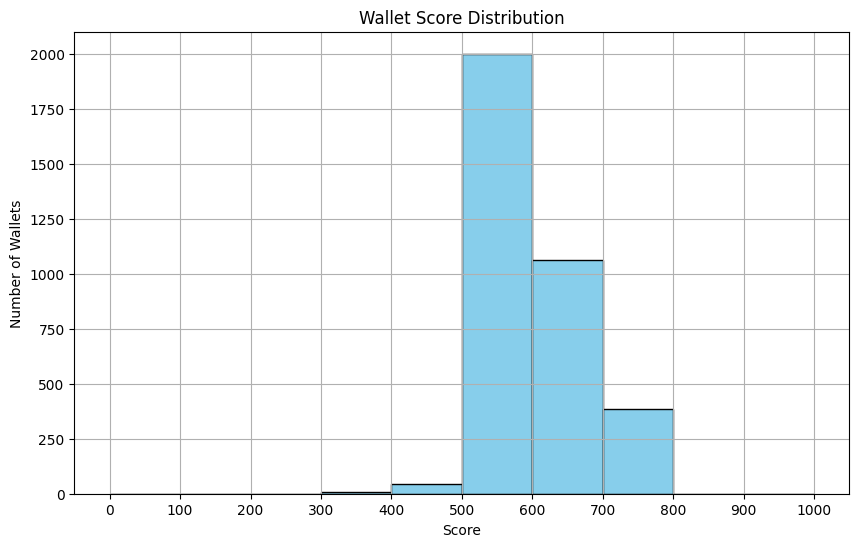

In [50]:
import matplotlib.pyplot as plt

# Define buckets
bins = list(range(0, 1100, 100))  # 0–1000 in 100-point steps
plt.figure(figsize=(10, 6))
plt.hist(wallet_features['score'], bins=bins, edgecolor='black', color='skyblue')
plt.title("Wallet Score Distribution")
plt.xlabel("Score")
plt.ylabel("Number of Wallets")
plt.xticks(bins)
plt.grid(True)
plt.savefig("score_distribution.png")
plt.show()